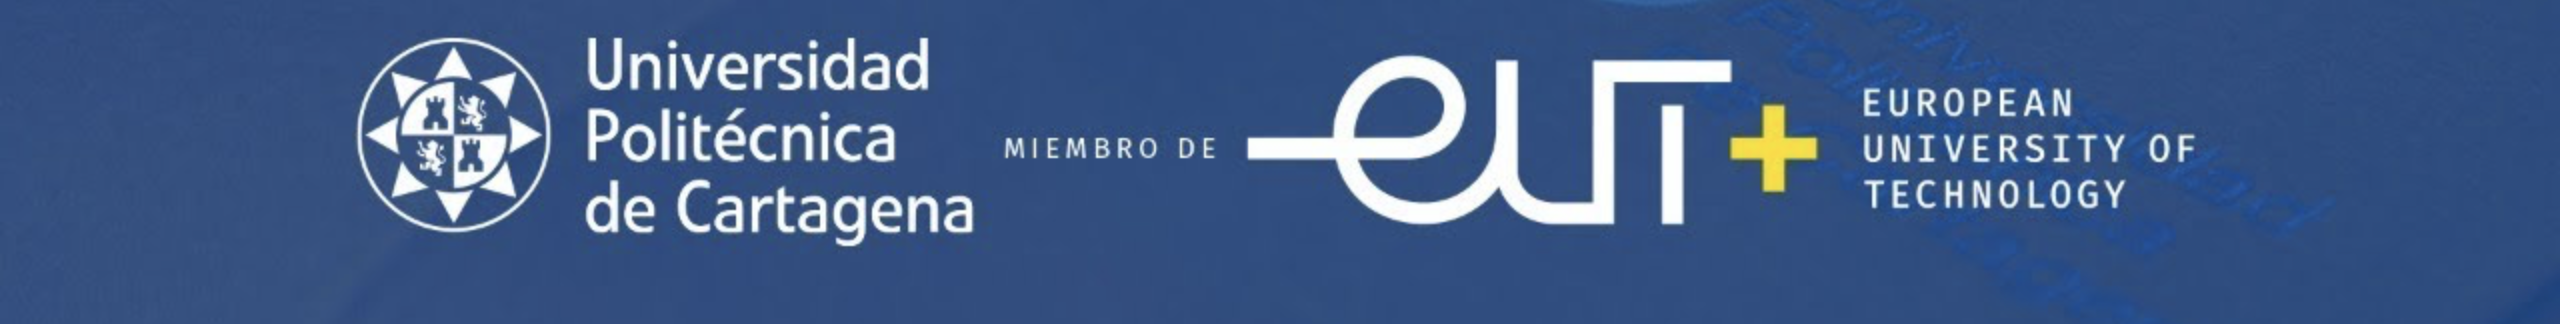

**MACHINE LEARNING II**

# PRÁCTICA 4: SESIÓN 1 - COMPUTACIÓN EVOLUTIVA


Los objetivos de aprendizaje de esta práctica son:
1) Comprender el funcionamiento de un algoritmo genético básico
2) Comprender el impacto de los distintos hiperparámetros en el mismo
3) Aplicar estos conocimientos a problemas prácticos

Para practicar con los algoritmos genéticos vamos a utilizar la librería `pymoo` (https://pymoo.org/), una librería de referencia en la computación evolutiva. 

Antes de comenzar con la práctica, es necesario instalarla (si no lo está ya) e importar varios módulos de ella.

In [1]:
# Descomentar este código para instalar las librerías en caso de no tenerlas ya
%pip install numpy
%pip install -U pymoo

#Implemente las librerías mencionadas 
import numpy as np
from pymoo.core.problem import ElementwiseProblem 
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.optimize import minimize

import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


 ## 1. Recordatorio - Algoritmos evolutivos

Como ya sabe, los algoritmos evolutivos sirven para buscar soluciones a problemas complejos de modelar o de evaluar, basándose en conceptos básicos de la Teoría de la Evolución, selección natural y genética (poblaciones, mutaciones, cruces, etc.)

Los pasos a seguir para solucionar un problema utilizando un algoritmo evolutivo serían:
- Definición del problema: Representar una posible solución del problema como un 'individuo', y un conjunto de posibles soluciones como una 'población'.
- Función de evaluación: Crear una función que evalúe una posible solución y diga como de 'buena' es. También es necesario establecer las restricciones correspondientes
- Operadores evolutivos: Definir cómo va a cambiar mi población en cada generación (cruce, mutación,etc.)
- Decidir hiperparámetros de la búsqueda: tamaño de población, nu´mero de iteraciones, etc.


 ## 2. Librería `pymoo`


Para desarrollar algoritmos evolutivos vamos a utilizar la librería `pymoo` (https://pymoo.org/). Esta librería es un framework que permite implementar distintos tipos de algoritmos evolutivos para optimización de problemas de objetivo simple o multi-objetivo, muy flexible y con muchos algoritmos de búsqueda implementados.

Ilustraremos su uso a través de un ejemplo sencillo, en concreto solucionar el siguiente problema:

---

Dada $f(x)= x sin(10\pi x)+1$,

diseñar un algoritmo evolutivo para encontrar:

$x^*$ tal que $f(x^*) \ge f(x), \forall x \in [-1,2]$. 

---

<small>Fuente: Inteligencia Artificial. J. Palma, R. Marín.  2008</small>


### 2.1 Definición del problema

En `pymoo`, cada problema a resolver tiene que estar definido como una clase, generalmente que heredará de `ElementwiseProblem`. Esta clase tendrá un método de construcción en el que habrá que llamar al de la superclase con los siguientes parámetros:
- **n_var**: Número de variables de nuestro problema. En este caso, será sólo $x$, así que el valor será 1.
- **n_obj**: Número de funciones objetivo a maximizar o minimizar. Los algoritmos evolutivos son capaces de resolver problemas en los que haya que evaluar de varias maneras a cada individuo (e.j. que maximice cierta función pero a la vez minimice otra). En este caso, sólo es una función, así que el valor será 1
- **n_constr**: Número de restricciones. Podemos obligar a que cada individuo cumpla ciertas condiciones para ser válido. En este caso no hay ninguna (salvo los rangos de $x$, que se indican posteriormente).
- **xl**: Mímimo (lower bound) para cada variable de decisión. En nuestro caso, será -1.
- **xu**: Máximo (upper bound) para cada variable de decisión. En nuestro caso, será 2.

In [2]:
class ProblemaSencillo(ElementwiseProblem):
    def __init__(self):
        super().__init__(n_var=1,     # Número de variables de decisión
                         n_obj=1,     # Número de funciones objetivo
                         n_constr=0,  # Número de restricciones
                         xl=-1,       # Mínimo
                         xu=2)        # Máximo

problema = ProblemaSencillo()

### 2.2 Función de evaluación

Lo siguiente a definir será la función para evaluar cada individuo. Hay que redefinirla dentro de nuestra clase en el método `_evaluate`, que consta de los siguientes parámetros:
- **x**: Vector de entrada que representa el individuo (solución) a evaluar.
- **out**: Diccionario donde hay que almacenar los resultados de la evaluación.
- **\*args** y **\*kwargs**: Parámetros adicionales para casos especiales

Hay que tener en cuenta que, por defecto, los problemas suelen ser de minimización, es decir, se busca el 'individuo' que minimiza la función de evaluación. Como este problema es de maximización, tenemos que multiplicar por -1 dicha función.

En el elemento **F** del diccionario _out_ deberemos almacenar el resultado de nuestra evaluación. Añadiendo este método a nuestro problema, quedaría de la siguiente manera:


In [3]:
class ProblemaSencillo(ElementwiseProblem):
    def __init__(self):
        super().__init__(n_var=1,     # Número de variables de decisión
                         n_obj=1,     # Número de funciones objetivo
                         n_constr=0,  # Número de restricciones
                         xl=-1,       # Mínimo
                         xu=2)        # Máximo
    
    def _evaluate(self, x, out, *args, **kwargs):
        out["F"] = -1*(x*np.sin(10*np.pi*x) + 1) # F almacena el resultado de la evaluación (ojo, minimización)

problema = ProblemaSencillo()

### 2.3 Operadores evolutivos

Lo siguiente sería definir qué operadores de mutación, cruce, selección, etc. vamos a utilizar. Por simplicidad, vamos a utilizar la clase `GA` de la librería, que implementa un algoritmo genético básico (representación binaria de los cromosomas, cruce y mutación estándar, etc.). Al usarla, ya hay que indicar cual va a ser el tamaño de nuestra población, uno de los hiperparámetros a fijar. También hay que indicar que es un problema de maximización, ya que por defecto busca el valor que minimiza la función objetivo:

In [4]:
class ProblemaSencillo(ElementwiseProblem):
    def __init__(self):
        super().__init__(n_var=1,     # Número de variables de decisión
                         n_obj=1,     # Número de funciones objetivo
                         n_constr=0,  # Número de restricciones
                         xl=-1,       # Mínimo
                         xu=2)        # Máximo
    
    def _evaluate(self, x, out, *args, **kwargs):
        out["F"] = -1*(x*np.sin(10*np.pi*x) + 1) # F almacena el resultado de la evaluación (ojo, minimización)

# Hiperparámetros
tam_poblacion = 50

problema = ProblemaSencillo()
algoritmo = GA(pop_size=tam_poblacion, eliminate_duplicates=True)

### 2.4 Ejecución del algoritmo

Lo último sería ejecutar el algoritmo. En este caso hay que indicar el segundo hiperparámetro relevante, que sería el número de generaciones. Para ejecutarlo, hay que utilizar el comando `minimize`. Se puede indicar que se guarde el histórico de todas las iteraciones para después mostrar la evolución:

In [5]:
num_generaciones = 20

res = minimize(problema,
               algoritmo,
               ('n_gen',num_generaciones),
               seed=1, # Recordad que muchas operaciones de los GA se realizan de manera aleatoria, por lo que es interesante establecer una semilla para reproducibilidad
               verbose=True,
               save_history=True
               )

n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       50 | -1.119959E+00 | -2.442705E+00
     2 |      100 | -1.667617E+00 | -2.660432E+00
     3 |      150 | -2.094791E+00 | -2.660432E+00
     4 |      200 | -2.347032E+00 | -2.695293E+00
     5 |      250 | -2.455511E+00 | -2.720947E+00
     6 |      300 | -2.565790E+00 | -2.831285E+00
     7 |      350 | -2.654546E+00 | -2.846765E+00
     8 |      400 | -2.700930E+00 | -2.846765E+00
     9 |      450 | -2.751703E+00 | -2.846765E+00
    10 |      500 | -2.812904E+00 | -2.850165E+00
    11 |      550 | -2.835059E+00 | -2.850165E+00
    12 |      600 | -2.842933E+00 | -2.850165E+00
    13 |      650 | -2.845844E+00 | -2.850245E+00
    14 |      700 | -2.847843E+00 | -2.850245E+00
    15 |      750 | -2.848713E+00 | -2.850245E+00
    16 |      800 | -2.849690E+00 | -2.850246E+00
    17 |      850 | -2.850041E+00 | -2.850246E+00
    18 |      900 | -2.850127E+00 | -2.850246E+00
    19 |      950 | -2.850203E+00 | -2.850246E+00


In [6]:
print(f"Mejor solución: x = {res.X}")


Mejor solución: x = [1.85072105]


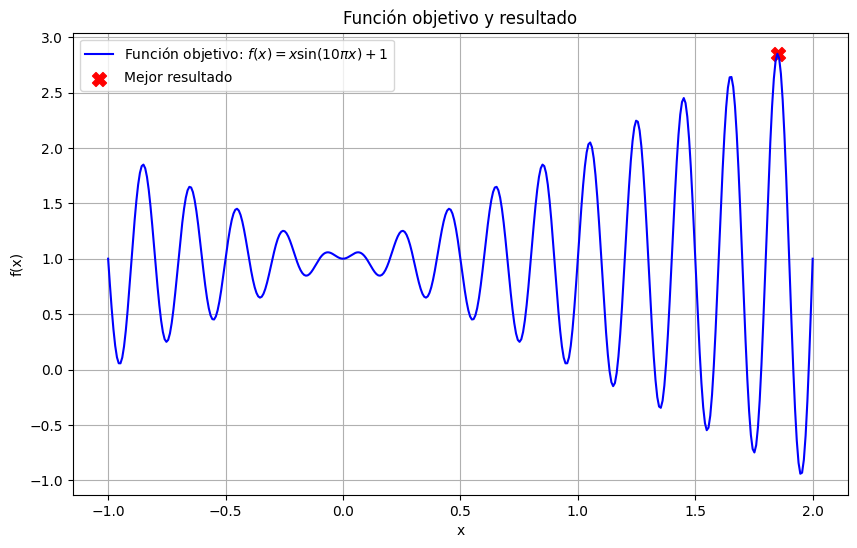

In [7]:
# Visualización de los resultados
x = np.linspace(-1, 2, 400)
plt.figure(figsize=(10, 6))
plt.plot(x, x * np.sin(10 * np.pi * x) + 1, label='Función objetivo: $f(x) = x \sin(10 \pi x) + 1$', color='blue')
plt.scatter(res.X,-res.F, color='red', marker='X', s=100, label='Mejor resultado')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Función objetivo y resultado')
plt.legend()
plt.grid(True)

plt.show()

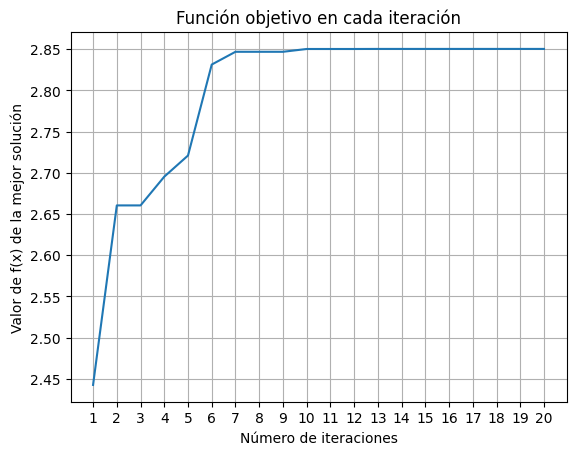

In [8]:
# Visualización del progreso de la función objetivo
val = [-1*e.opt.get("F")[0] for e in res.history]
plt.plot(np.arange(1,len(val)+1,1), val)
plt.xticks(ticks=np.arange(1,len(val)+1, 1)) 
plt.xlabel('Número de iteraciones')
plt.ylabel('Valor de f(x) de la mejor solución')
plt.title('Función objetivo en cada iteración')
plt.grid(True)
plt.show()

Podemos ver como se encuentra con un máximo local en las iteraciones 2 y 3, pero aún así el algoritmo es capaz de seguir buscando hasta encontrar el máximo global.

## 3. Ejercicios

### 3.1. Encontrar la frase secreta

Dada una frase oculta que desconocemos (pero almacenada en una variable), desarrollar un algoritmo evolutivo que intente encontrarla. Asumir que conocemos la longitud de la frase, y podemos acceder a la variable en la función de evaluación. Además, tened en cuenta que:
- En los métodos que admitan una semilla para números aleatorios, utilizaremos el valor 1.
- Realizaremos dos ejecuciones con conjuntos de parámetros distintos:
    + Ejecución 1:
        - Tamaño de población: 50
        - Número de generaciones: 20
    + Ejecución 2:
        - Tamaño de población: 350
        - Número de generaciones: 100


Notas/Pistas:
- Los caracteres ASCII que componen la cadena estarán limitados del 32 (espacio) hasta el 122 (z).
- Podemos asumir que cada letra de la frase será una variable, o mejor, el valor ASCII del carácter.



In [9]:
FRASE_SECRETA = "Me encantan las clases de ML-II"

**SOLUCION**

En primer lugar, tenemos que pensar cómo representar nuestra frase. Siguiendo el ejemplo anterior:
- **n_var**: Podemos asumir que cada letra de la frase será una variable, o mejor, el valor ASCII del carácter.
- **n_obj**: El objetivo será 1, el encontrar la frase.
- **n_constr**: Ninguna constraint
- **xl**: El mínimo valor ASCII será 32.
- **xu**: El máximo valor ASCII será el 122.

Lo siguiente será la función de evaluación. Podemos contar cuántos caracteres iguales tiene cada individuo al compararlo con la cadena objetivo. Recordad que tenemos que ponerlo como problema de minimización, así que hay que multiplicar por -1. El problema quedaría así:

In [10]:
class ProblemaFraseOculta(ElementwiseProblem):
    def __init__(self):
        super().__init__(
            n_var=len(FRASE_SECRETA),   # Número de caracteres en la frase
            n_obj=1,                    # Un solo objetivo
            n_constr=0,                 # Sin restricciones
            xl=32,                      # Valor ASCII mínimo (espacio)
            xu=122)                     # Valor ASCII máximo (z)
    
    def _evaluate(self, x, out, *args, **kwargs):
        # Contar caracteres coincidentes
        coincidencias = sum(1 for i in range(len(FRASE_SECRETA))
                            if chr(int(x[i])) == FRASE_SECRETA[i])
        # Maximización = minimizar el negativo
        out["F"] = -1 * coincidencias

Ejecución 1: Se haría de manera similar al primer ejemplo, con los parámetros adecuados

In [11]:
tam_poblacion = 50
num_generaciones = 20

problema = ProblemaFraseOculta()
algoritmo = GA(pop_size=tam_poblacion, eliminate_duplicates=True)
res = minimize(problema,
               algoritmo,
               ('n_gen', num_generaciones),
               seed=1,
               verbose=True,
               save_history=True)

n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       50 | -3.800000E-01 | -2.000000E+00
     2 |      100 | -9.400000E-01 | -2.000000E+00
     3 |      150 | -1.380000E+00 | -2.000000E+00
     4 |      200 | -1.940000E+00 | -3.000000E+00
     5 |      250 | -2.220000E+00 | -3.000000E+00
     6 |      300 | -2.560000E+00 | -4.000000E+00
     7 |      350 | -3.120000E+00 | -5.000000E+00
     8 |      400 | -3.420000E+00 | -6.000000E+00
     9 |      450 | -3.960000E+00 | -6.000000E+00
    10 |      500 | -4.480000E+00 | -7.000000E+00
    11 |      550 | -5.220000E+00 | -8.000000E+00
    12 |      600 | -5.760000E+00 | -8.000000E+00
    13 |      650 | -6.320000E+00 | -8.000000E+00
    14 |      700 | -6.680000E+00 | -8.000000E+00
    15 |      750 | -7.460000E+00 | -9.000000E+00
    16 |      800 | -7.880000E+00 | -1.000000E+01
    17 |      850 | -8.380000E+00 | -1.000000E+01
    18 |      900 | -8.660000E+00 | -1.000000E+01
    19 |      950 | -9.240000E+00 | -1.200000E+01


In [12]:
print(f"Mejor solución:  {''.join(chr(int(c)) for c in res.X)}")

Mejor solución:  ^F ,[-ant,Bi8.S<c')sesc`e^,[-II


In [13]:
# Evolución de la solución
print("Mejores individuos de cada generación")
print("-------------------------------------")
for i in range(0,len(res.history)):
    print(f"{i+1}: {''.join(chr(int(c)) for c in res.history[i].opt.get('X')[0])}")

Mejores individuos de cada generación
-------------------------------------
1: ^E$P[NuTq,,hC.s?caoXc?8pFv[W*uH
2: ^E$P[NuTq,,hC.s?caoXc?8pFv[W*uH
3: ^E$P[NuTq,,hC.s?caoXc?8pFv[W*uH
4: 3/0Cc_DjL@xW*1;oc7`.*=4Uj3Z'&II
5: 3/0Cc_DjL@xW*1;oc7`.*=4Uj3Z'&II
6: 3F0DdyDiLYxW+1snc'\W,=2cq_["&II
7: qq8*1!aVt.nW8)Qhea,sagdPeW,g+O?
8: rq7*.^a4tjnt8MQk.c)sfgdPer,@*vI
9: rq7*.^a4tjnt8MQk.c)sfgdPer,@*vI
10: SF5+S!am5YCWX1Qgy'+sefdce_,f-II
11: ry ,.xa1t-nt8MQ>.c)se(dPer+[-sA
12: ry ,.xa1t-nt8MQ>.c)se(dPer+[-sA
13: ry ,.xa1t-nt8MQ>.c)se(dPer+[-sA
14: ry ,.xa1t-nt8MQ>.c)se(dPer+[-sA
15: ^O +\!pn5,CWX6sjx7pse?fbe_'f-II
16: rq *T^a1t-nj8)Qecb)segdPeZ,g*II
17: rq *T^a1t-nj8)Qecb)segdPeZ,g*II
18: rq *T^a1t-nj8)Qecb)segdPeZ,g*II
19: ^F ,[-ant,Bi8.S<c')sesc`e^,[-II
20: ^F ,[-ant,Bi8.S<c')sesc`e^,[-II


Ejecución 2: En la anterior se ha visto como se aproxima, pero no es capaz de encontrar la solución. Vamos a probar aumentando tanto el tamaño de población como las generaciones


In [14]:
tam_poblacion = 350
num_generaciones = 100

problema = ProblemaFraseOculta()
algoritmo = GA(pop_size=tam_poblacion, eliminate_duplicates=True)
res = minimize(problema,
               algoritmo,
               ('n_gen', num_generaciones),
               seed=1,
               verbose=True,
               save_history=True)

n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |      350 | -3.542857E-01 | -4.000000E+00
     2 |      700 | -9.028571E-01 | -4.000000E+00
     3 |     1050 | -1.457143E+00 | -4.000000E+00
     4 |     1400 | -2.011429E+00 | -4.000000E+00
     5 |     1750 | -2.580000E+00 | -6.000000E+00
     6 |     2100 | -3.185714E+00 | -6.000000E+00
     7 |     2450 | -3.642857E+00 | -6.000000E+00
     8 |     2800 | -4.205714E+00 | -6.000000E+00
     9 |     3150 | -4.528571E+00 | -7.000000E+00
    10 |     3500 | -5.017143E+00 | -7.000000E+00
    11 |     3850 | -5.557143E+00 | -8.000000E+00
    12 |     4200 | -6.062857E+00 | -9.000000E+00
    13 |     4550 | -6.588571E+00 | -1.100000E+01
    14 |     4900 | -7.145714E+00 | -1.100000E+01
    15 |     5250 | -7.671429E+00 | -1.100000E+01
    16 |     5600 | -8.311429E+00 | -1.400000E+01
    17 |     5950 | -8.891429E+00 | -1.400000E+01
    18 |     6300 | -9.600000E+00 | -1.400000E+01
    19 |     6650 | -1.016857E+01 | -1.400000E+01


In [15]:
print(f"Mejor solución:  {''.join(chr(int(c)) for c in res.X)}")

Mejor solución:  Me encantan las clases de ML-II


In [16]:
# Evolución de la solución
print("Mejores individuos de cada generación")
print("-------------------------------------")
for i in range(0,len(res.history)):
    print(f"{i+1}: {''.join(chr(int(c)) for c in res.history[i].opt.get('X')[0])}")

Mejores individuos de cada generación
-------------------------------------
1: i />bxaKrAY 0:BIg9'NxD7eW xL;[9
2: i />bxaKrAY 0:BIg9'NxD7eW xL;[9
3: i />bxaKrAY 0:BIg9'NxD7eW xL;[9
4: i />bxaKrAY 0:BIg9'NxD7eW xL;[9
5: M(R>bualwEX 0o#JB.'N-;,J5 xL^[I
6: M(R>bualwEX 0o#JB.'N-;,J5 xL^[I
7: M(R>bualwEX 0o#JB.'N-;,J5 xL^[I
8: M(R>bualwEX 0o#JB.'N-;,J5 xL^[I
9: :$/eObb_2AH 1ak*c9lUd1%dW NYfIN
10: :$/eObb_2AH 1ak*c9lUd1%dW NYfIN
11: u\ #"*airao$8fk%KaaF0s dE"1K?I%
12: u\ eL<aisao 5fm$<aav0sndD"@K?I%
13: ." eI,a5&\n]Lbq.xlas5R d;M9N+II
14: ." eI,a5&\n]Lbq.xlas5R d;M9N+II
15: ." eI,a5&\n]Lbq.xlas5R d;M9N+II
16: Ec pn,an^Zn Mas DlQ(qs dFqS%*mI
17: Ec pn,an^Zn Mas DlQ(qs dFqS%*mI
18: Ec pn,an^Zn Mas DlQ(qs dFqS%*mI
19: Ec pn,an^Zn Mas DlQ(qs dFqS%*mI
20: Ec pn,an^Zn Mas DlQ(qs dFqS%*mI
21: M\ enaa2san 5Am0clZs0s d:)oL.I=
22: M\ enaa2san 5Am0clZs0s d:)oL.I=
23: Eg en`a(tan MAs0clZs0s dE!oL.IK
24: Eg en`a(tan MAs0clZs0s dE!oL.IK
25: Eg en`a(tan MAs0clZs0s dE!oL.IK
26: M" en.api^n .as >&vyes dy PL-

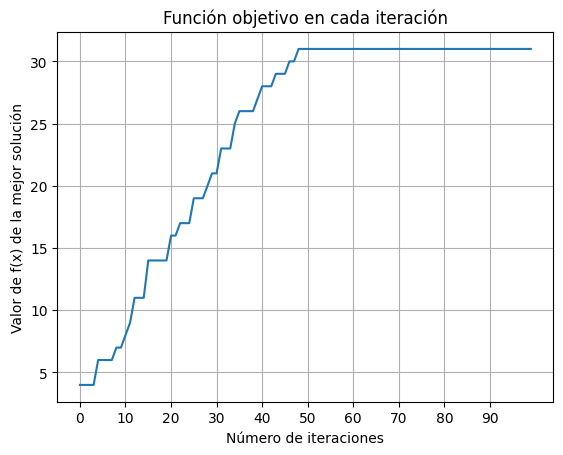

In [17]:
# Visualización del progreso de la función objetivo
val = [-1*e.opt.get("F")[0] for e in res.history]
plt.plot(np.arange(0,len(val),1), val)
plt.xticks(ticks=np.arange(0,len(val), 10)) 
plt.xlabel('Número de iteraciones')
plt.ylabel('Valor de f(x) de la mejor solución')
plt.title('Función objetivo en cada iteración')
plt.grid(True)
plt.show()

### 3.3. Warren Buffet genético

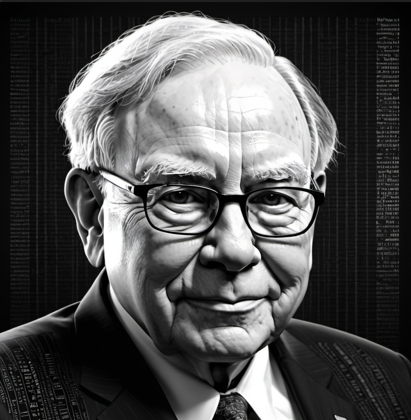

<small>Imagen creada con OpenArt.ai</small>

Dadas las cotizaciones de Google, Amazon, Apple y Tesla durante los tres primeros meses de 2024 (**61 días, (desde día 0 hasta día 60)** de cotizaciones), utilice un algoritmo genérico para encontrar **qué día comprar**, **qué día vender**, y **cuantas acciones de cada empresa** habría que haber operado para haber obtenido los mayores beneficios asumiendo que:
- Se compra todo en un día.
- Se vende todo en un día.
- Se pueden comprar hasta 60 acciones de una misma empresa.

NOTAS/PISTAS: 
 - Se entiende que el día de venta tiene que ser posterior al de compra. Asignar un valor particular a la función objetivo en dicho caso para evitar declarar restricciones. Recuerde que tanto los días como el número de acciones han de ser enteros para poder operar con ellos.
 - En este caso, tenemos 6 variables en nuestro problema: el día de compra el día de venta, y la cantidad de cada acción a comprar. En lugar de una función representada por una ecuación, tenemos una maximizar una ecuación que es la combinación de cuatro funciones "explícitas".


In [18]:
# Valores al cierre de cada compañía

google = np.array([138.01, 138.76, 136.23, 135.57, 138.68, 140.79, 142.12, 141.92, 142.49,
 142.33, 141.31, 143.32, 146.21, 145.82, 146.87, 148.53, 151.70, 152.02,
 153.33, 151.29, 139.94, 141.00, 142.22, 143.52, 143.93, 145.37, 145.74,
 148.83, 147.36, 144.97, 145.77, 142.61, 140.36, 140.96, 142.39, 143.92,
 143.79, 137.41, 138.72, 136.22, 138.30, 136.98, 133.20, 132.52, 131.25,
 134.23, 135.25, 137.51, 138.34, 139.63, 142.94, 141.02, 147.51, 146.86,
 148.57, 147.43, 150.60, 149.90, 150.50, 150.70, 150.76])
amazon = np.array([149.93, 148.47, 144.57, 145.24, 149.10, 151.37, 153.73, 155.18, 154.62,
 153.16, 151.71, 153.50, 155.34, 154.78, 156.02, 156.87, 157.75, 159.12,
 161.26, 159.00, 155.20, 159.28, 171.81, 170.31, 169.15, 170.53, 169.84,
 174.45, 172.34, 168.64, 170.98, 169.80, 169.51, 167.08, 168.59, 174.58,
 174.99, 174.73, 173.54, 173.16, 176.76, 178.22, 177.58, 174.12, 173.51,
 176.82, 175.35, 171.96, 175.39, 176.56, 178.75, 174.42, 174.48, 175.90,
 178.15, 178.15, 178.87, 179.71, 178.30, 179.83, 180.38])
apple = np.array([185.15, 183.77, 181.43, 180.70, 185.07, 184.65, 185.70, 185.10, 185.43,
 183.15, 182.20, 188.13, 191.06, 193.38, 194.67, 193.99, 193.66, 191.91,
 191.23, 187.55, 183.92, 186.37, 185.36, 187.19, 188.80, 188.91, 187.83,
 188.59, 186.90, 184.79, 183.90, 183.61, 182.06, 181.31, 182.07, 184.12,
 182.27, 180.91, 182.38, 181.17, 180.51, 179.42, 174.86, 169.89, 168.89,
 168.77, 170.50, 172.52, 173.00, 170.90, 172.77, 172.39, 173.48, 175.84,
 178.43, 171.14, 172.05, 170.62, 169.48, 173.08, 171.25])
tesla=np.array([248.42, 238.45, 237.93, 237.49, 240.45, 234.96, 233.94, 227.22, 218.89,
 219.91, 215.55, 211.88, 212.19, 208.80, 209.14, 207.83, 182.63, 183.25,
 190.93, 191.59, 187.29, 188.86, 187.91, 181.06, 185.10, 187.58, 189.56,
 193.57, 188.13, 184.02, 188.71, 200.45, 199.95, 193.76, 194.77, 197.41,
 191.97, 199.40, 199.73, 202.04, 201.88, 202.64, 188.14, 180.74, 176.54,
 178.65, 175.34, 177.77, 177.54, 169.48, 162.50, 163.57, 173.80, 171.32,
 175.66, 172.82, 170.83, 172.63, 177.67, 179.83, 175.79])

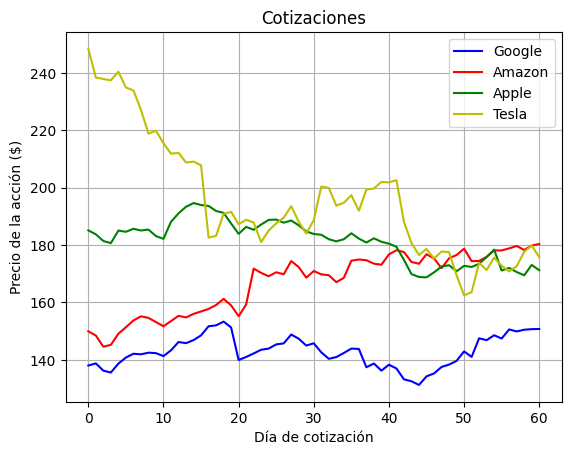

In [19]:
diasEstudio = len(google)
plt.plot(np.arange(0,diasEstudio,1), google, 'b', label='Google')
plt.plot(np.arange(0,diasEstudio,1), amazon, 'r', label='Amazon')
plt.plot(np.arange(0,diasEstudio,1), apple, 'g', label='Apple')
plt.plot(np.arange(0,diasEstudio,1), tesla, 'y', label='Tesla')
plt.xlabel('Día de cotización')
plt.ylabel('Precio de la acción ($)')
plt.title('Cotizaciones')
plt.legend()
plt.grid(True)
plt.show()

_DISCLAIMER: Este enunciado es puramente un ejercicio para aplicar algoritmos genéticos. Ninguna de las acciones indicadas es recomendación de compra ni de venta. No se recomienda utilizar el algoritmo resultante como estrategia de inversión._

**SOLUCION**

In [20]:
class ProblemaWarrenBuffet(ElementwiseProblem):
    def __init__(self):
        super().__init__(
            n_var=6,                    # 6 varaibles: dia_compra, dia_venta, acc_google, acc_amazon, acc_apple, acc_tesla
            n_obj=1,                    # Un solo objetivo: maximizar beneficio
            n_constr=0,                 # Sin restricciones
            xl=np.array([0, 0, 0, 0, 0, 0]),        # Mínimos
            xu=np.array([60, 60, 60, 60, 60, 60])   # Máximos
        )
    
    def _evaluate(self, x, out, *args, **kwargs):
        dia_compra = int(x[0])
        dia_venta = int(x[1])
        acc_google = int(x[2])
        acc_amazon = int(x[3])
        acc_apple = int(x[4])
        acc_tesla = int(x[5])

        # Verificar que el día de venta sea posterior al de compra
        if dia_venta <= dia_compra:
            # Asignar un valor muy malo (penalización)
            out['F'] = 1e10
        else:
            # Calcular beneficio
            coste_compra = (acc_google * google[dia_compra] +
                            acc_amazon * amazon[dia_compra] +
                            acc_apple * apple[dia_compra] +
                            acc_tesla * tesla[dia_compra])
            
            ingreso_venta = (acc_google * google[dia_venta] +
                            acc_amazon * amazon[dia_venta] +
                            acc_apple * apple[dia_venta] +
                            acc_tesla * tesla[dia_venta])
            
            beneficio = ingreso_venta - coste_compra

            # Maximizar = minimizar el negativo
            out['F'] = -1 * beneficio

In [21]:
tam_poblacion = 100
num_generaciones = 20

problema = ProblemaWarrenBuffet()
algoritmo = GA(pop_size=tam_poblacion, eliminate_duplicates=True)
res = minimize(problema,
               algoritmo,
               ('n_gen', num_generaciones),
               seed=1,
               verbose=True,
               save_history=True)

n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |      100 |  4.500000E+09 | -8.369000E+02
     2 |      200 |  1.596498E+02 | -1.540350E+03
     3 |      300 | -4.644601E+02 | -1.600170E+03
     4 |      400 | -8.143160E+02 | -1.663320E+03
     5 |      500 | -1.136103E+03 | -1.782180E+03
     6 |      600 | -1.439402E+03 | -2.120410E+03
     7 |      700 | -1.657306E+03 | -2.454280E+03
     8 |      800 | -1.836201E+03 | -2.454280E+03
     9 |      900 | -2.034194E+03 | -2.505280E+03
    10 |     1000 | -2.177338E+03 | -2.638840E+03
    11 |     1100 | -2.318516E+03 | -2.759090E+03
    12 |     1200 | -2.419978E+03 | -2.759090E+03
    13 |     1300 | -2.516054E+03 | -2.781910E+03
    14 |     1400 | -2.604849E+03 | -2.784140E+03
    15 |     1500 | -2.687960E+03 | -2.811560E+03
    16 |     1600 | -2.746815E+03 | -2.836100E+03
    17 |     1700 | -2.783320E+03 | -2.882310E+03
    18 |     1800 | -2.805791E+03 | -2.917370E+03
    19 |     1900 | -2.825916E+03 | -2.925860E+03


In [22]:
print(f"Mejor solución:  Comprar {int(res.X[2])} acc de Google, {int(res.X[3])} acc de Amazon, {int(res.X[4])} acc de Apple y {int(res.X[5])} acc de Tesla el día {int(res.X[0])} y vender el día {int(res.X[1])} Beneficio: {-1*res.F[0]} $")

Mejor solución:  Comprar 59 acc de Google, 59 acc de Amazon, 1 acc de Apple y 0 acc de Tesla el día 3 y vender el día 59 Beneficio: 2925.8600000000006 $


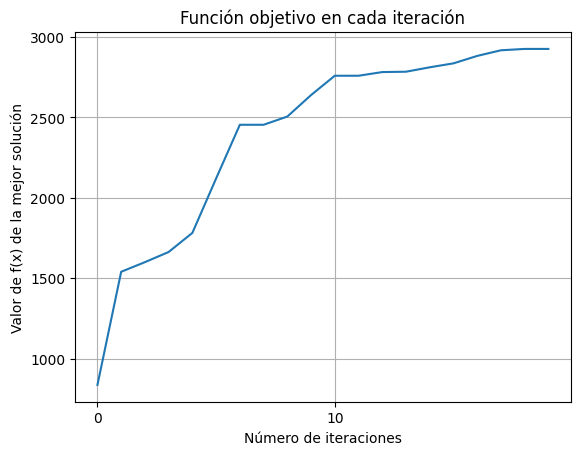

In [23]:
# Visualización del progreso de la función objetivo
val = [-1*e.opt.get("F")[0] for e in res.history]
plt.plot(np.arange(0,len(val),1), val)
plt.xticks(ticks=np.arange(0,len(val), 10)) 
plt.xlabel('Número de iteraciones')
plt.ylabel('Valor de f(x) de la mejor solución')
plt.title('Función objetivo en cada iteración')
plt.grid(True)
plt.show()